In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from subprocess import call
sys.path.append('../')
from package_global_functions import *
latexFont(titlesize=11, ticklabelssize=11, labelsize=13, legendsize=12)

In [2]:
def cross_in_func(pop,*kwargs):
    # kwargs 
    # first: linear, sigmoid 1 or 2...
    # second: x0
    # third: a
    # fouth: make superior part of the sigmoid linear (True) or not
    if not kwargs or kwargs[0] == 0 or kwargs[0] == 'lin':
        return pop
    elif kwargs[0] == 1 or kwargs[0] == 'sigmoid1':
        x0, a = kwargs[1], kwargs[2]
        cival = 1/(1+np.exp(-a*(pop-x0))) 
        if len(kwargs) == 4 and kwargs[3]:
            cival = min(cival, pop)
        return cival
    elif kwargs[0] == 2 or kwargs[0] == 'sigmoid2':
        x0, a = kwargs[1], kwargs[2]
        return pop/(1+np.exp(-a*(pop-x0)))

## Sigmoid functions sample

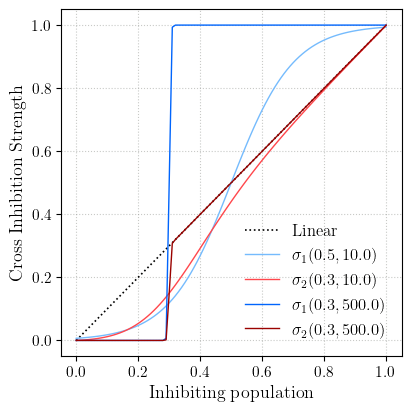

In [14]:
# plot the sigmoid functions used:
fig, ax = plt.subplots(1,1, figsize=(4,4), constrained_layout=True)
ax.set(ylabel='Cross Inhibition Strength', xlabel='Inhibiting population')
ax.grid(color='xkcd:gray', ls=':', alpha=0.5)
xs = np.arange(0.0, 1.01, 0.01)

ci_kwargs_list = [(0,), (1, 0.5, 10.0), (2, 0.3, 10.0), (1, 0.3, 500.0), (2, 0.3, 500.0)]
color_seq = ['k', 'xkcd:sky blue', 'xkcd:light red', 'xkcd:bright blue', 'xkcd:deep red']

ci_kwargs_labels = []
for ci_kwargs in ci_kwargs_list:
    if len(ci_kwargs) == 1:
        ci_kwargs_labels.append("Linear")
    elif len(ci_kwargs) == 4 and int(ci_kwargs[3]) == 1:
        ci_kwargs_labels.append(fr"$\sigma_{ci_kwargs[0]}^{{lin}} ({ci_kwargs[1]}, {ci_kwargs[2]})$")
    else:
        ci_kwargs_labels.append(fr"$\sigma_{ci_kwargs[0]} ({ci_kwargs[1]}, {ci_kwargs[2]})$")

for ci_kwargs,c,label in zip(ci_kwargs_list,color_seq,ci_kwargs_labels):
    civals = cross_in_func(xs, *ci_kwargs)
    lw=1.2 if ci_kwargs == (0,) else 1.0
    ls=':' if ci_kwargs == (0,) else '-'
    ax.plot(xs, civals, color=c, label=label, lw=lw, ls=ls)

fig.legend(loc=(0.58,0.16), frameon=False)
fig.savefig('cimods_sample.pdf')

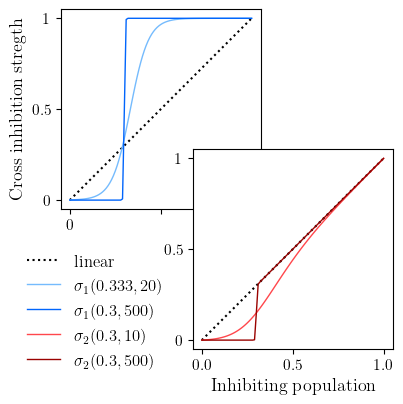

In [7]:
# fig = plt.figure(figsize=(4, 4), constrained_layout=True)
fig = plt.figure(figsize=(4, 4))

# nice but they take too much space and the labels can't be seen
# ax1 = fig.add_axes([0.05, 0.4, 0.55, 0.55])
# ax2 = fig.add_axes([0.4, 0.05, 0.55, 0.55])
ax1 = fig.add_axes([0.14, 0.47, 0.5, 0.5])
ax2 = fig.add_axes([0.47, 0.12, 0.5, 0.5])

xs = np.arange(0.0, 1.01, 0.01)
ls, lw = '-', 1.0

# x -----
ax1.set_xticks(ticks=[0.0, 0.5, 1.0])
ax1.set_xticklabels(['0', '', ''])
ax2.set_xticks(ticks=[0.0, 0.5, 1.0])
ax2.set_xlabel('Inhibiting population')
# y -----
ax1.set_yticks(ticks=[0.0, 0.5, 1.0])
ax1.set_yticklabels(['0', '0.5', '1'])
ax2.set_yticks(ticks=[0.0, 0.5, 1.0])
ax2.set_yticklabels(['0', '0.5', '1'])
ax1.set_ylabel('Cross inhibition stregth')

# linear ci in both subplots
ax1.plot(xs, xs, ls=':', color='k', label='linear')
ax2.plot(xs, xs, ls=':', color='k', label='_nolabel_')


# ci_kwargs_1 = [(1, 0.5, 10.0), (1, 0.3, 500.0)]
ci_kwargs_1 = [(1, 0.333, 20.0), (1, 0.3, 500.0)] # this would be interesting to try
# ci_kwargs_1 = [(1, 0.3, 20.0), (1, 0.3, 500.0)]
colors_1 = ['xkcd:sky blue', 'xkcd:bright blue']
for ci_kwargs,c in zip(ci_kwargs_1,colors_1):
    label = fr"$\sigma_{ci_kwargs[0]} ({ci_kwargs[1]}, {int(ci_kwargs[2])})$"
    civals = cross_in_func(xs, *ci_kwargs)
    ax1.plot(xs, civals, color=c, lw=lw, ls=ls, label=label)


ci_kwargs_2 = [(2, 0.3, 10.0), (2, 0.3, 500.0)]
colors_2 = ['xkcd:light red', 'xkcd:deep red']
for ci_kwargs,c in zip(ci_kwargs_2,colors_2):
    label = fr"$\sigma_{ci_kwargs[0]} ({ci_kwargs[1]}, {int(ci_kwargs[2])})$"
    civals = cross_in_func(xs, *ci_kwargs)
    ax2.plot(xs, civals, color=c, lw=lw, ls=ls, label=label)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h, l = h1+h2, l1+l2
topRightCorner = (0.65, 0.63)
bottomLeftCroner = (0.05, 0.07)
fig.legend(h, l, frameon=False, loc=bottomLeftCroner)

fig.savefig('cimods_sample_splitted_v2.pdf')

## Bifurcations as a function of lambda

In [10]:
pis, qs = [0.1, 0.1], [9.0, 10.0]

# Generic lambdas
ls = np.arange(0.0, 1.0, 0.04)
# ls = np.arange(0.0,0.9,0.1)
ci_kwargs = [0, ]

# ci_kwargs = [1, 0.5, 10.0]
ci_kwargs = [1, 0.333, 20.0]
# ci_kwargs = [2, 0.3, 10.0]
# ci_kwargs = [1, 0.3, 500.0]
# ci_kwargs = [2, 0.3, 500.0]

# OTHER LAMBDAS
if ci_kwargs == [0,]:
    # linear cross-inhibition, qs 9 10, pis 0.1 0.1...
    ls1 = np.arange(0.0, 0.24, 0.04)
    ls2 = np.arange(0.28, 1.0, 0.04)
    ls_close = np.array([0.18, 0.22, 0.23, 0.25]) # ac
    ls = np.concatenate([ls1, ls_close, ls2])
    ls = np.sort(ls)
elif ci_kwargs == [1, 0.3, 500.0]:
    # Non linear cross inhibition, qs 9 10, pis 0.1 0.1...
    ls = np.arange(0.0, 1.0, 0.04)
else:
    ls = np.arange(0.0, 1.0, 0.04)

pichainExec = ','.join([str(pi) for pi in pis]) 
qchainExec = ','.join([str(q) for q in qs])
ci_kwargs_chainExec = ','.join([str(cikw) for cikw in ci_kwargs])

sols = {'lower':[[],[],[]], 'mid':[[],[],[]], 'upper':[[],[],[]]}
for l in ls:
    call(f'python model_sols.py -pis {pichainExec} -qs {qchainExec} -l {l} -lci 1.0 -ci_kwargs {ci_kwargs_chainExec} > sols.dat', shell=True)
    solsdf = pd.read_csv(f'sols.dat', names=['f0', 'f1', 'f2', 'method', 'ic'], header=None, sep='\s+')
    solsdf = solsdf.sort_values(by=['f2'])
    # print(l, len(solsdf))
    if len(solsdf) == 3:
        iterKeys = enumerate(sols.keys())
    elif len(solsdf) == 1:
        iterKeys = enumerate(['upper', ])
    for i,k in iterKeys:
        for j in range(3):
            sols[k][j].append(solsdf[f'f{j}'].iloc[i])
    

/home/david/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/david/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/david/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/david/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version 

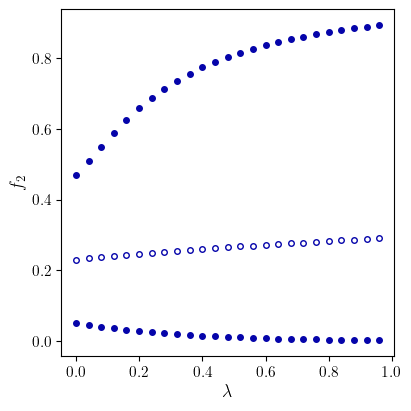

In [11]:
fig, ax = plt.subplots(1,1, figsize=(4,4), constrained_layout=True)
ax.set(xlabel=f'$\lambda$', ylabel=f'$f_2$')

for sol_id,fs in sols.items():
    color = 'xkcd:royal blue'
    mfc = 'w' if sol_id == 'mid' else color
    ax.plot(ls[len(ls)-len(fs[2]):], fs[2], marker='o', ms=4, lw=0, mfc=mfc, color=color)

pichain = '_'.join([str(pi) for pi in pis]) 
qchain = '_'.join([str(q) for q in qs])
ci_kwargs_chain = '_'.join([str(cikw) for cikw in ci_kwargs])
fig.savefig(f'f2evo_lambda_pis_{pichain}_qs_{qchain}_lci_1.0_ci_kwargs_{ci_kwargs_chain}.pdf')

## two bifurcations in the same plot

In [45]:
pis, qs = [0.1, 0.1], [9.0, 10.0]

# ci_kwargs = [1, 0.5, 10.0]
# ci_kwargs = [1, 0.333, 20.0]
# ci_kwargs = [2, 0.3, 10.0]
# ci_kwargs = [1, 0.3, 500.0]
# ci_kwargs = [2, 0.3, 500.0]

ci_kwargs_list = [(0, ), (1, 0.3, 500.0), (2, 0.3, 10.0)]
sols_cikw = {}

for ci_kwargs in ci_kwargs_list:
    # chose lambdas
    if ci_kwargs == [0,]:
        # linear cross-inhibition, qs 9 10, pis 0.1 0.1...
        ls1 = np.arange(0.0, 0.24, 0.04)
        ls2 = np.arange(0.28, 1.0, 0.04)
        ls_close = np.array([0.18, 0.22, 0.23, 0.25]) # ac
        ls = np.concatenate([ls1, ls_close, ls2])
        ls = np.sort(ls)
    elif ci_kwargs == [1, 0.3, 500.0]:
        # Non linear cross inhibition, qs 9 10, pis 0.1 0.1...
        ls = np.arange(0.0, 1.0, 0.04)
    else:
        ls = np.arange(0.0, 1.0, 0.04)

    pichainExec = ','.join([str(pi) for pi in pis]) 
    qchainExec = ','.join([str(q) for q in qs])
    ci_kwargs_chainExec = ','.join([str(cikw) for cikw in ci_kwargs])

    sols_cikw[ci_kwargs] = {'lower':[[],[],[]], 'mid':[[],[],[]], 'upper':[[],[],[]]}
    for l in ls:
        call(f'python model_sols.py -pis {pichainExec} -qs {qchainExec} -l {l} -lci 1.0 -ci_kwargs {ci_kwargs_chainExec} > sols.dat', shell=True)
        colnames = ['f0', 'f1', 'f2', 'method', 'ic'] if ci_kwargs[0] != 0 else ['f0', 'f1', 'f2']
        solsdf = pd.read_csv(f'sols.dat', names=colnames, header=None, sep='\s+')
        solsdf = solsdf.sort_values(by=['f2'])
        # print(l, len(solsdf))
        if len(solsdf) == 3:
            iterKeys = enumerate(sols.keys())
        elif len(solsdf) == 1:
            iterKeys = enumerate(['upper', ])
        for i,k in iterKeys:
            for j in range(3):
                sols_cikw[ci_kwargs][k][j].append(solsdf[f'f{j}'].iloc[i])

/home/david/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/david/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/david/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/david/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version 

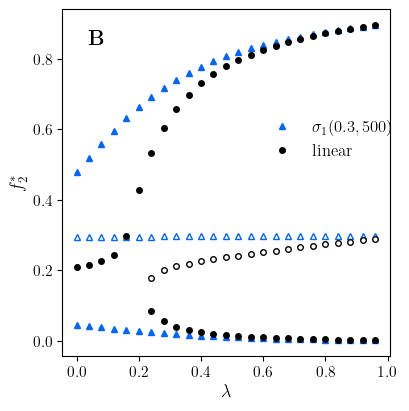

In [42]:
fig, ax = plt.subplots(1,1, figsize=(4,4), constrained_layout=True)
ax.set(xlabel=f'$\lambda$', ylabel=f'$f_2^*$')


markers = ['o', '^']

colors = ['xkcd:royal blue', 'xkcd:red'] # default

ci_kwargs_list = [(0, ), (1, 0.3, 500.0)]
colors = ['k', 'xkcd:bright blue'] # when linear and type1 sharp

# ci_kwargs_list = [(0, ), (2, 0.3, 10.0)]
# colors = ['k', 'xkcd:light red'] # when linear and type2 smooth

reverse = True
if reverse:
    cikwl, cl, ml = reversed(ci_kwargs_list), reversed(colors), reversed(markers)
else:
    cikwl, cl, ml = ci_kwargs_list, colors, markers


for ci_kwargs, color, marker in zip(cikwl, cl, ml):
    for sol_id,fs in sols_cikw[ci_kwargs].items():
        if ci_kwargs[0] != 0 and sol_id == 'upper':
            label = fr"$\sigma_{ci_kwargs[0]} ({ci_kwargs[1]}, {int(ci_kwargs[2])})$"
        elif ci_kwargs[0] == 0 and sol_id == 'upper':
            label = 'linear'
        else:
            label = '_nolabel_'
        mfc = 'w' if sol_id == 'mid' else color
        ax.plot(ls[len(ls)-len(fs[2]):], fs[2], marker=marker, ms=4, lw=0, mfc=mfc, color=color, label=label)

ax.legend(frameon=False, loc=(0.6, 0.55))
ax.text(0.08, 0.9, r'$\textbf{B}$', transform=ax.transAxes)
ci_kwargs_chain = '_'.join([str(cikw) for cikw in ci_kwargs_list[1]])
fig.savefig(f'f2evo_lambda_pis_{pichain}_qs_{qchain}_lci_1.0_ci_kwargs_0_and_{ci_kwargs_chain}.pdf')

### all three

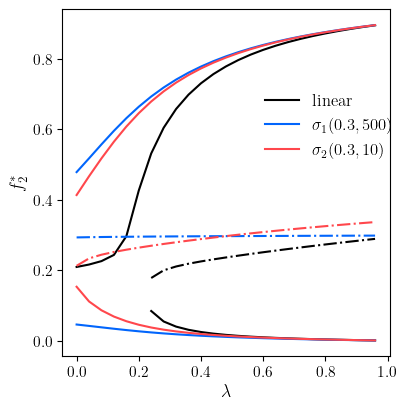

In [52]:
fig, ax = plt.subplots(1,1, figsize=(4,4), constrained_layout=True)
ax.set(xlabel=f'$\lambda$', ylabel=f'$f_2^*$')

ci_kwargs_list = [(0, ), (1, 0.3, 500.0), (2, 0.3, 10.0)]
colors = ['k', 'xkcd:bright blue', 'xkcd:light red']
# markers = ['o', 's', '^']
liness = ['-', '-.', ':']

for ci_kwargs, color in zip(ci_kwargs_list, colors):
    for sol_id,fs in sols_cikw[ci_kwargs].items():
        if ci_kwargs[0] != 0 and sol_id == 'upper':
            label = fr"$\sigma_{ci_kwargs[0]} ({ci_kwargs[1]}, {int(ci_kwargs[2])})$"
        elif ci_kwargs[0] == 0 and sol_id == 'upper':
            label = 'linear'
        else:
            label = '_nolabel_'
        mfc = 'w' if sol_id == 'mid' else color
        lines = '-.' if sol_id == 'mid' else '-'
        ax.plot(ls[len(ls)-len(fs[2]):], fs[2], ls=lines, ms=4, lw=1.5, mfc=mfc, color=color, label=label)

ax.legend(frameon=False, loc=(0.6, 0.55))